In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
path  = "C:/Users/Katra/Downloads/survey_results_public.csv"
df= pd.read_csv(path)

# Data Exploration & Cleaning

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [3]:
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

df[df.duplicated()]


Total duplicate rows: 0


,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly


In [4]:
df = df.drop_duplicates().reset_index(drop=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [6]:
df['EdLevel'].fillna('Something else', axis=0, inplace=True)   #Fill missing values
df.drop(['US_State', 'UK_Country', 'ResponseId', 'CompTotal'], axis=1, inplace=True)   #Drop columns without meaning

df['Country'] = df['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'], 'United Kingdom')
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)    #Rename the column to Salary

In [7]:
df = df[df['Country'].isin(['Slovakia', 'Netherlands','Russian Federation', 'Austria', 'United Kingdom',
                           'Sweden','Spain','Germany','France', 'Switzerland', 'Poland', 'Ukraine','Portugal', 'Italy', 'Bulgaria', 'Greece',
                           'Ireland','Hungary', 'Belgium','Albania','Romania','Lithuania', 'Slovenia','Croatia','Czech Republic','Denmark',
                            'Serbia','Estonia','Finland','Bosnia and Herzegovina','Norway','Belarus','Luxembourg','Malta','Cyprus',
                            'Latvia','Iceland','Republic of Moldova','Montenegro','Monaco','Liechtenstein'])]

In [8]:
df.head()

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,Salary
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [9]:
df['Country'].sort_values().unique()

array(['Albania', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
       'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Republic of Moldova', 'Romania', 'Russian Federation',
       'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Ukraine', 'United Kingdom'], dtype=object)

In [10]:
df = df[['EdLevel','Country', 'YearsCodePro',"Employment", 'Age','Age1stCode', 'DevType', 'LanguageHaveWorkedWith', 'OrgSize', 'OpSys', 'Salary']]

In [11]:
df = df[df["Employment"]== "Employed full-time"]

In [12]:
df = df.dropna()

In [13]:
df.YearsCodePro.unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', '3', '1', '12', '8',
       '14', 'Less than 1 year', '7', '26', '11', '25', '22', '15', '13',
       '9', '20', '24', '27', '23', '30', '17', '28', '19', '35', '29',
       '38', '45', '33', '36', '40', '34', '32', '42', '41', '39', '37',
       '31', '47', '43', '44', 'More than 50 years'], dtype=object)

In [14]:
def experience(x):
    if x == 'More than 50 years':
        return 55
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(experience)

In [15]:
df.YearsCodePro.unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  3. ,  1. , 12. ,
        8. , 14. ,  0.5,  7. , 26. , 11. , 25. , 22. , 15. , 13. ,  9. ,
       20. , 24. , 27. , 23. , 30. , 17. , 28. , 19. , 35. , 29. , 38. ,
       45. , 33. , 36. , 40. , 34. , 32. , 42. , 41. , 39. , 37. , 31. ,
       47. , 43. , 44. , 55. ])

In [16]:
df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Other doctoral degree (Ph.D., Ed.D., etc.)'],
      dtype=object)

In [17]:
def education (x):
    if 'Professional degree' in x or 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if  'Other doctoral degree' in x:
        return 'Post Grad'
    return 'Less than a Bachelors'

df["EdLevel"] = df['EdLevel'].apply(education)
df.EdLevel.unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post Grad'], dtype=object)

In [18]:
df.DevType.unique()

array(['Data scientist or machine learning specialist',
       'Developer, back-end',
       'Developer, desktop or enterprise applications;Developer, back-end',
       ..., 'Developer, full-stack;Engineer, data;Scientist;Designer',
       'Developer, back-end;Database administrator;DevOps specialist;Product manager',
       'Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, embedded applications or devices;Engineering manager;Educator'],
      dtype=object)

In [19]:
def dev_type(x):
    if 'full-stack' in x:
        return 'Full-stack Developer'
    if 'back-end' in x:
        return 'Back-end Developer'
    if 'front-end' in x:
        return 'Front-end Developer'
    if 'mobile' in x:
        return 'Mobile Developer'
    if 'DevOps' in x:
        return 'DevOps Specialist'
    if 'Data scientist' in x:
        return 'Data Scientist or ML Specialist'
    if 'Data engineer' in x:
        return 'Data Engineer'
    if 'analyst' in x:
        return 'Data or Business Analyst'
    if 'game' in x:
        return 'Game Developer'
    if 'QA' in x:
        return 'QA tester'
    if 'researcher' in x:
        return 'Academic Reseacher'
    if 'Senior Executive' in x:
        return 'Senior Executive'
    if 'System administrator' in x:
        return 'System Administrator'
    if 'reliability' in x:
        return 'Engineer, Site Reliability'
    if 'Product manager' in x:
        return 'Product Manager'
    if 'Database' in x:
        return 'Database Administrator'
    if 'Engineering manager' in x:
        return 'Engineering Manager'


df['DevType'] = df['DevType'].apply(dev_type)
df['DevType'].sort_values().unique()

array(['Academic Reseacher', 'Back-end Developer',
       'Data Scientist or ML Specialist', 'Data or Business Analyst',
       'Database Administrator', 'DevOps Specialist',
       'Engineer, Site Reliability', 'Engineering Manager',
       'Front-end Developer', 'Full-stack Developer', 'Game Developer',
       'Mobile Developer', 'Product Manager', 'QA tester',
       'Senior Executive', 'System Administrator', None], dtype=object)

In [20]:
df.DevType.value_counts()

DevType
Full-stack Developer               8140
Back-end Developer                 3884
Front-end Developer                1076
Mobile Developer                    557
Data Scientist or ML Specialist     550
Academic Reseacher                  324
DevOps Specialist                   309
Data or Business Analyst            158
System Administrator                135
QA tester                           133
Game Developer                      125
Engineering Manager                 112
Senior Executive                     70
Product Manager                      45
Engineer, Site Reliability           36
Database Administrator               18
Name: count, dtype: int64

In [21]:
df.LanguageHaveWorkedWith.unique()

array(['C++;Python',
       'Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;TypeScript',
       'C;C++;Java;Perl;Ruby', ...,
       'Groovy;HTML/CSS;Java;JavaScript;Node.js;PHP;PowerShell;TypeScript',
       'Bash/Shell;C#;C++;Go;Groovy;HTML/CSS;Java;JavaScript;Kotlin;Node.js;PHP;Python;Scala;SQL;TypeScript',
       'Bash/Shell;C;Go;Java;JavaScript;Perl;SQL'], dtype=object)

In [22]:
def prog_lang(x):
    if 'JavaScript' in x:
        return 'JavaScript'
    if 'HTML/CSS' in x:
        return 'HTML/CSS'
    if 'PHP' in x:
        return 'PHP'
    if 'Python' in x:
        return 'Python'
    if 'Java' in x:
        return 'Java'
    if 'Bash/Shell' in x:
        return 'Bash/Shell'
    if 'C++' in x:
        return 'C++'
    if 'C' in x:
        return 'C'
    if 'C#' in x:
        return 'C#'
    if 'Node.js' in x:
        return 'Node.js'
    if 'SQL' in x:
        return 'SQL'
    if 'Ruby' in x:
        return 'Ruby'
    if 'PowerShell' in x:
        return 'PowerShell'
    if 'Go' in x:
        return 'Go'
    if 'Scala' in x:
        return "Scala"
    if 'Kotlin' in x:
        return 'Kotlin'
    if 'TypeScript' in x:
        return 'TypeScript'
    if 'Perl' in x:
        return 'Perl'
    if 'R' in x:
        return 'R'
    if 'Matlab' in x:
        return 'Matlab'
    if 'Julia' in x:
        return 'Julia'
    if 'Objective-C' in x:
        return "Objective-C"
    if 'Swift' in x:
        return 'Swift'
    if 'VBA' in x:
        return 'VBA'
    if 'Assembly' in x:
        return "Assembly"
    if 'Dart' in x:
        return 'Dart'
    if 'Groovy' in x:
        return 'Groovy'
    if 'Haskell' in x:
        return "Haskell"


df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].apply(prog_lang)

In [23]:
df = df.dropna()

In [24]:
df.isna().sum()

EdLevel                   0
Country                   0
YearsCodePro              0
Employment                0
Age                       0
Age1stCode                0
DevType                   0
LanguageHaveWorkedWith    0
OrgSize                   0
OpSys                     0
Salary                    0
dtype: int64

In [25]:
df.Country.value_counts()

Country
Germany                   2526
United Kingdom            2391
France                    1271
Spain                      837
Netherlands                782
Poland                     725
Italy                      709
Russian Federation         691
Sweden                     688
Switzerland                393
Norway                     380
Ukraine                    363
Belgium                    319
Denmark                    318
Finland                    309
Austria                    300
Czech Republic             282
Portugal                   271
Romania                    253
Greece                     248
Bulgaria                   209
Ireland                    200
Hungary                    195
Serbia                     132
Croatia                    114
Slovenia                   112
Lithuania                  109
Slovakia                    84
Belarus                     77
Estonia                     76
Bosnia and Herzegovina      51
Latvia                      49


# Exploratory Data Analysis and Vizualizations

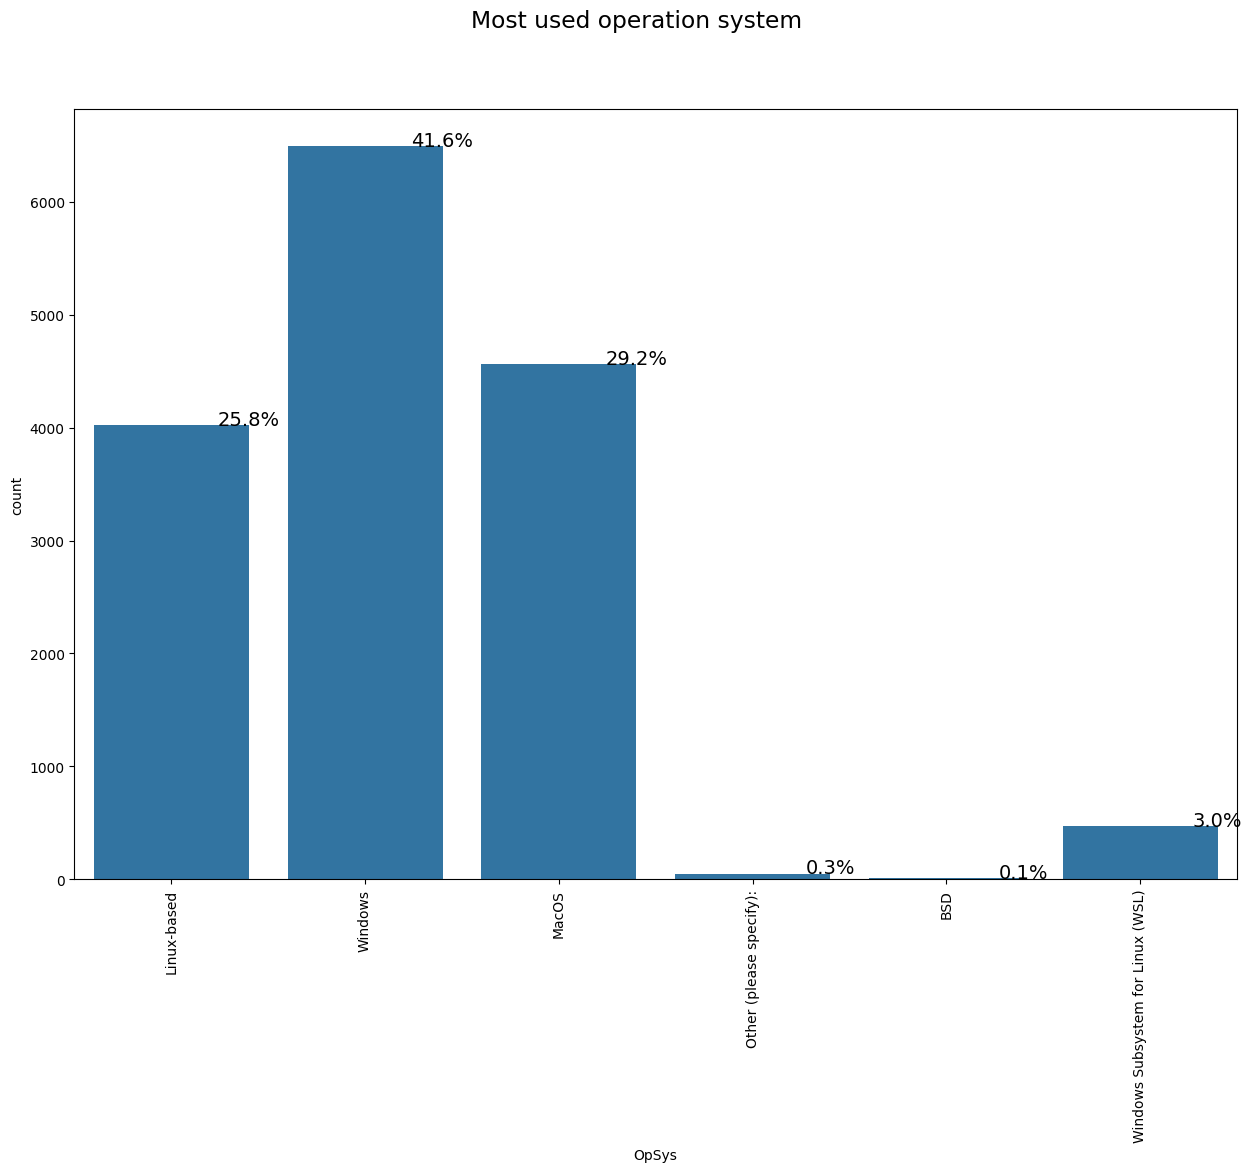

In [26]:
plt.subplots(figsize=(15,10))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='OpSys', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('Most used operation system')
plt.xticks(rotation=90)
plt.show()

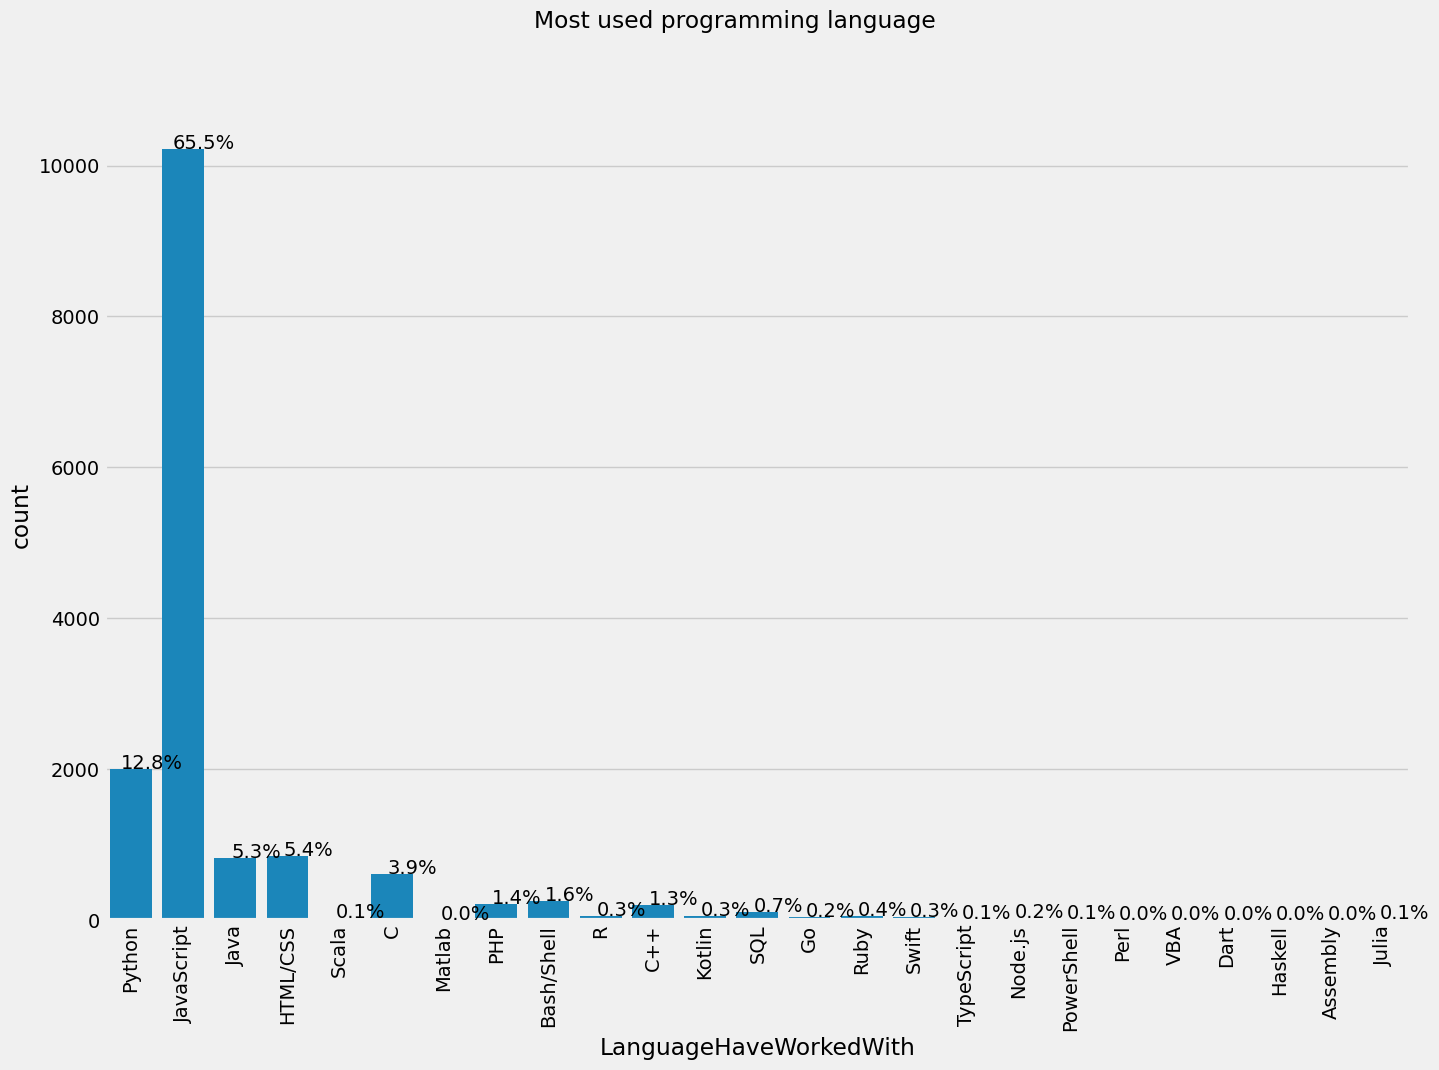

In [27]:
plt.subplots(figsize=(15,10))
plt.style.use('fivethirtyeight')
ax =sns.countplot(x='LanguageHaveWorkedWith', data=df)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    hue = p.get_height()
    ax.annotate(percentage, (x, hue),ha='center')
plt.suptitle('Most used programming language')
plt.xticks(rotation=90)
plt.show()

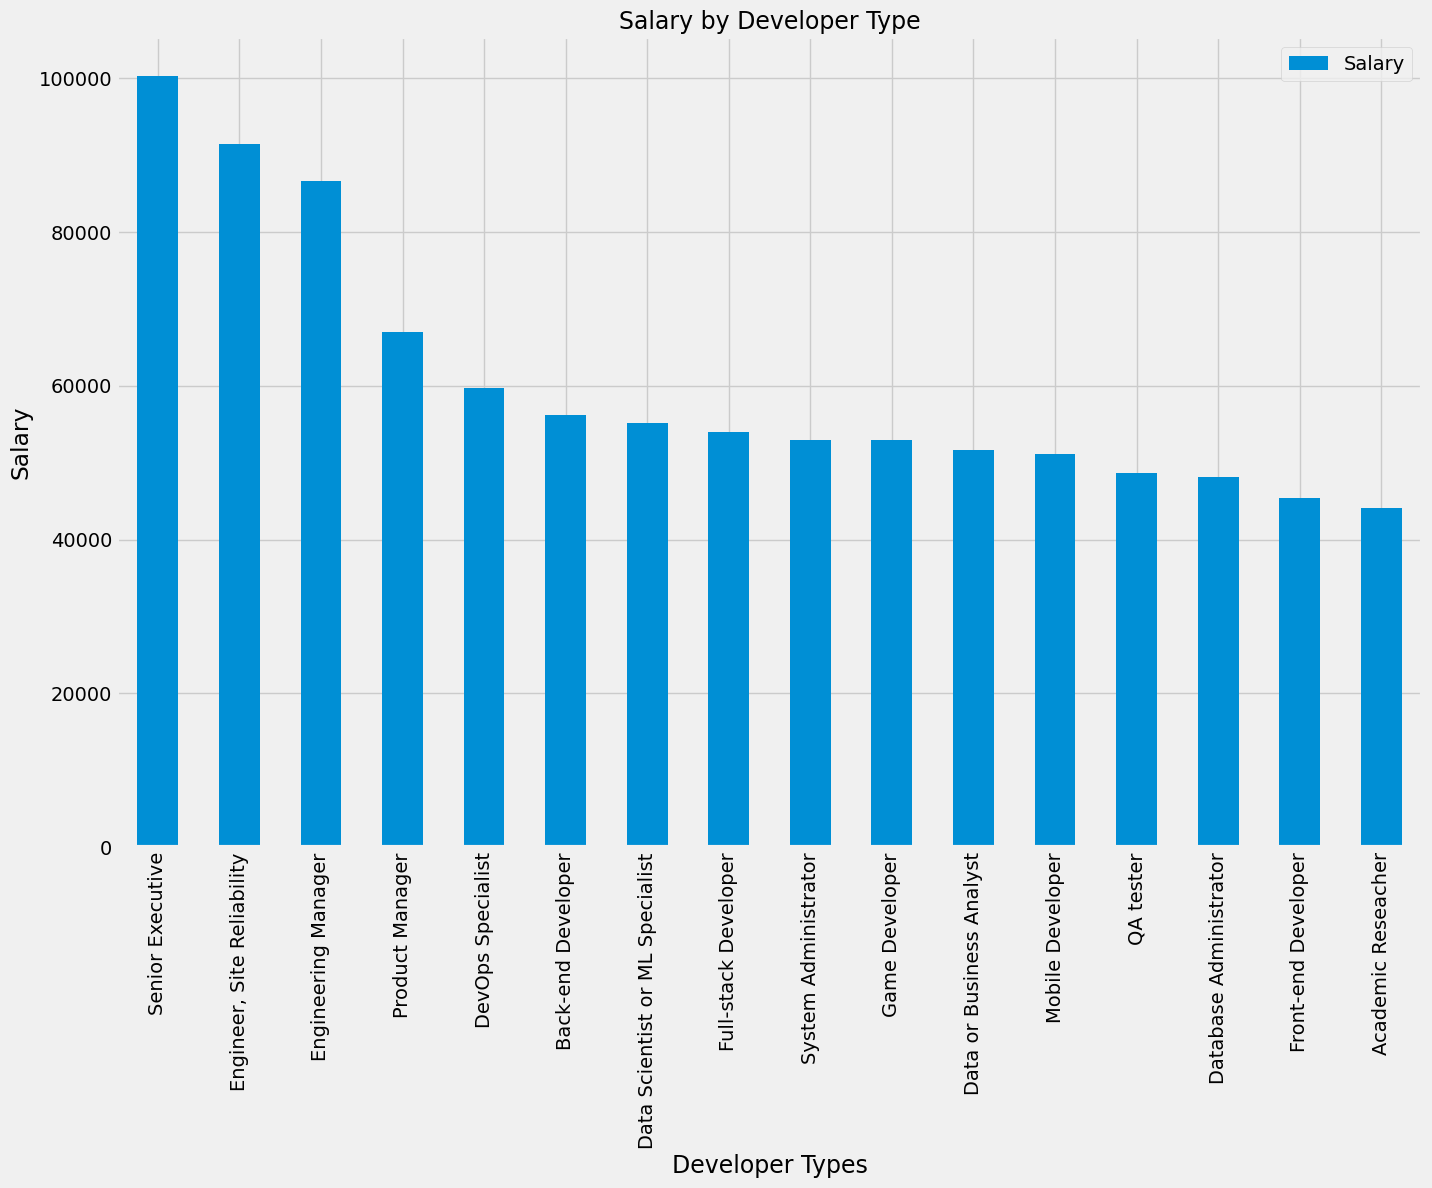

In [28]:
dev_salary = df[['DevType', 'Salary']].pivot_table(index='DevType', values=['Salary'], aggfunc='median')

plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph2 = dev_salary.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Salary by Developer Type', size=17)
plt.xlabel('Developer Types', size=17)
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show();

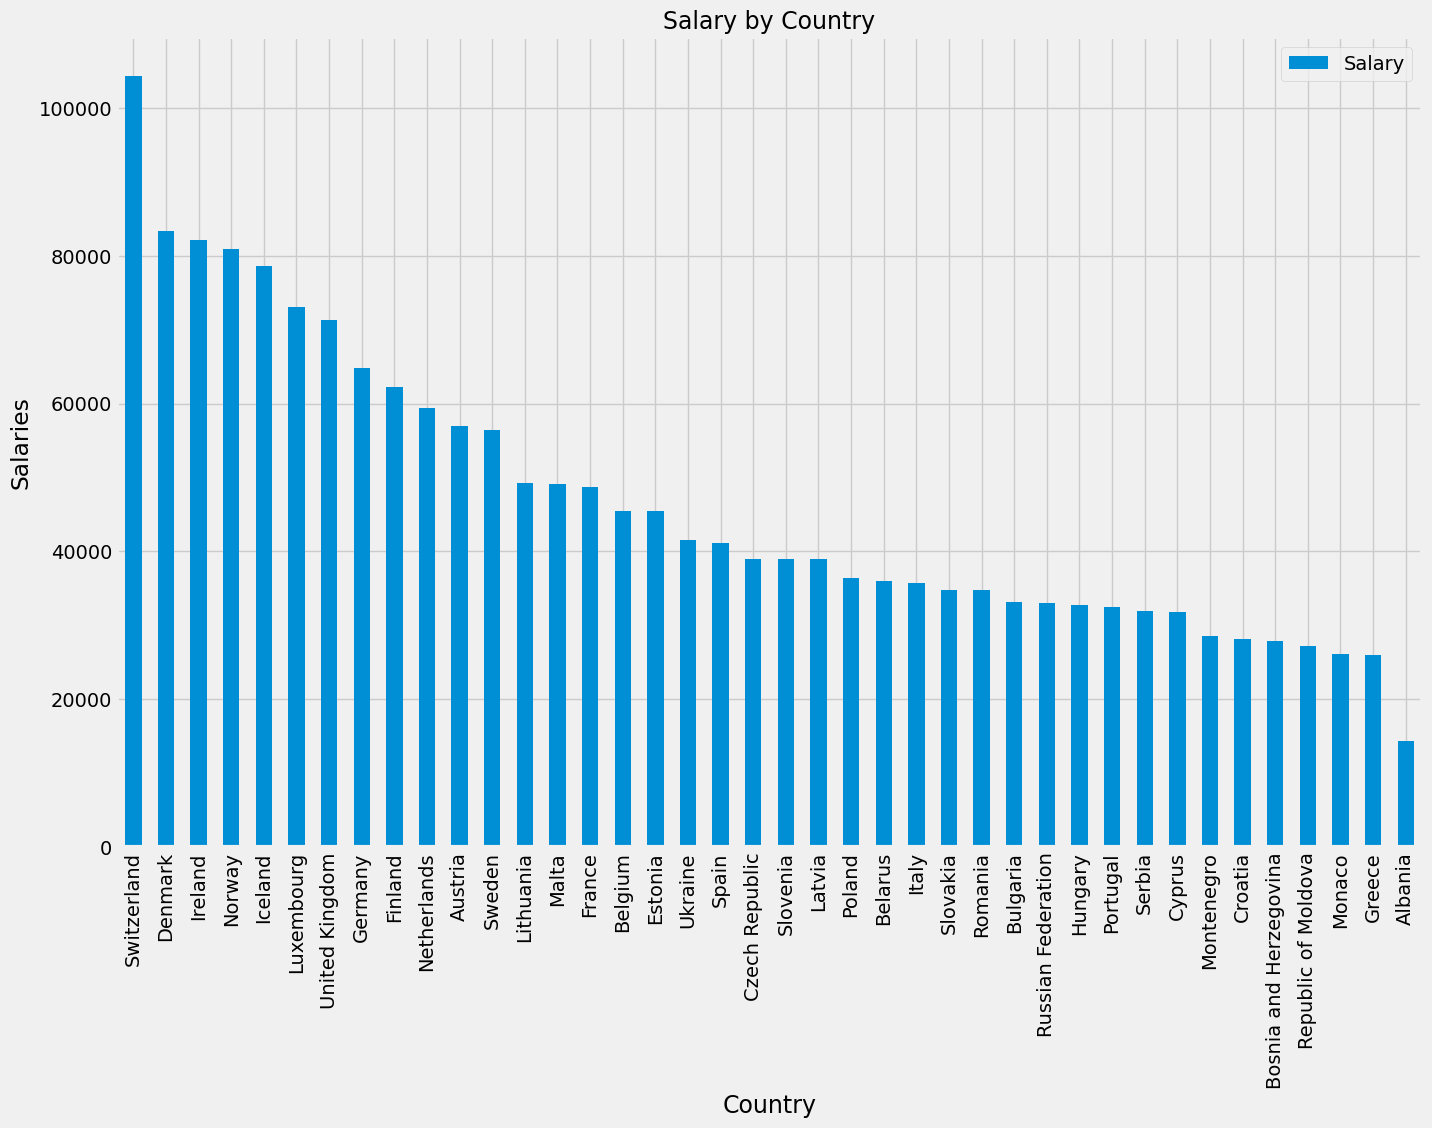

In [29]:
salary_by_country = df[['Country', 'Salary']].pivot_table(index='Country', values=['Salary'], aggfunc='median')


plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = salary_by_country.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Salary by Country', size=17)
plt.xlabel('Country', size=17)
plt.ylabel('Salaries')
plt.xticks(rotation=90)
plt.show();

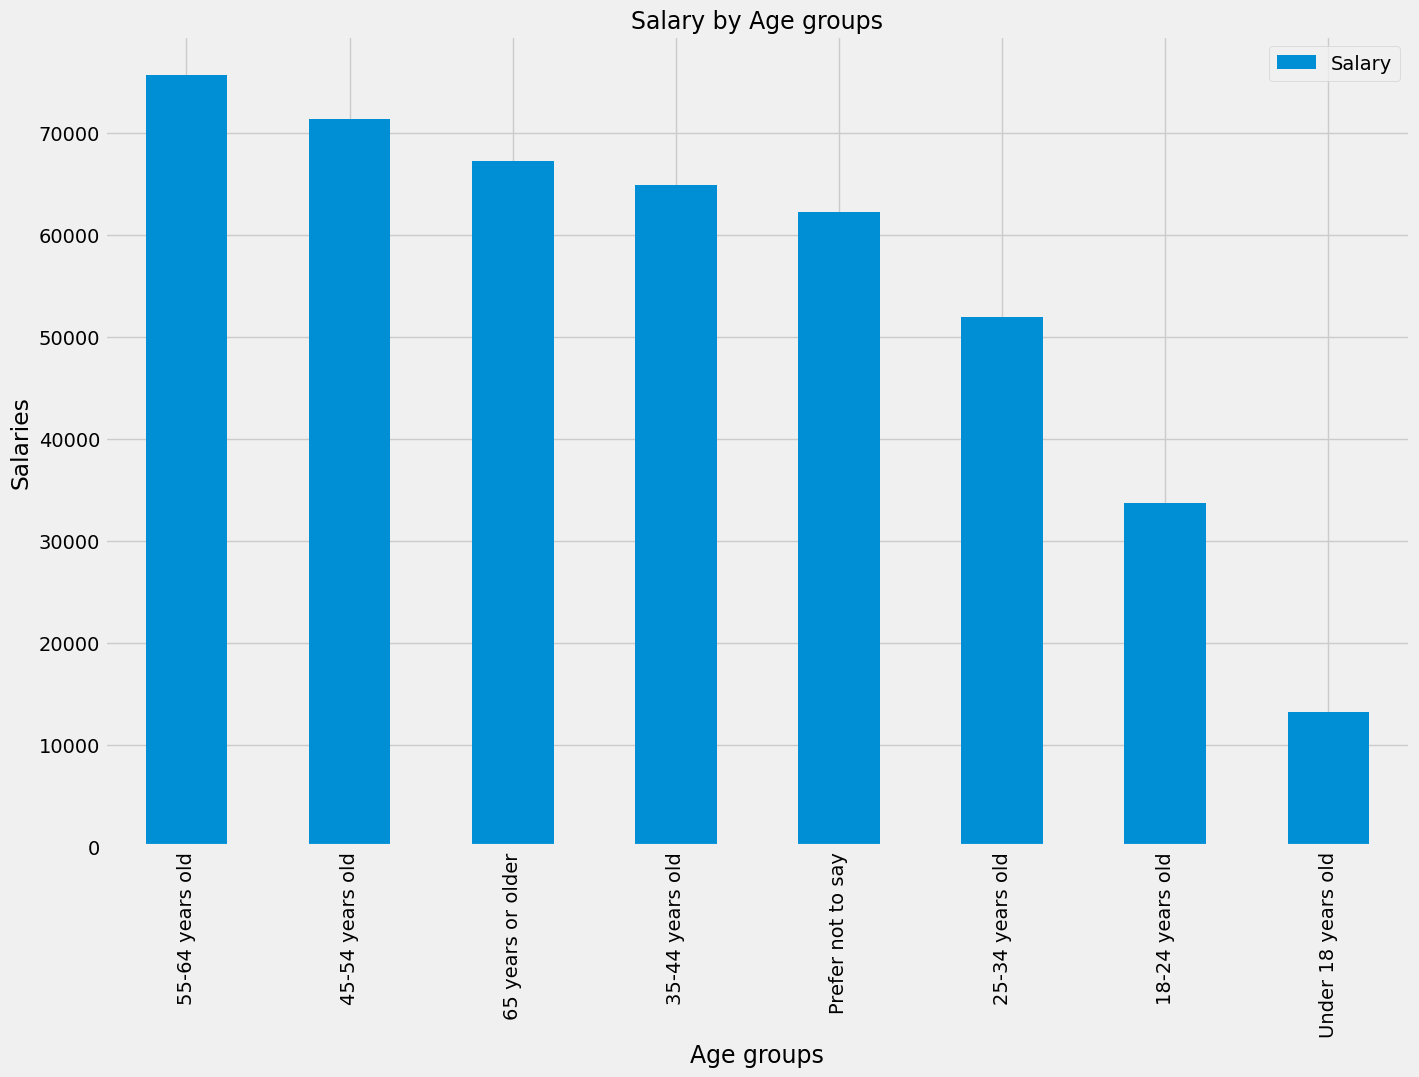

In [30]:
salary_by_age = df[['Age', 'Salary']].pivot_table(index='Age', values=['Salary'], aggfunc='median')

plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = salary_by_age.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Salary by Age groups', size=17)
plt.xlabel('Age groups', size=17)
plt.ylabel('Salaries')
plt.xticks(rotation=90)
plt.show();

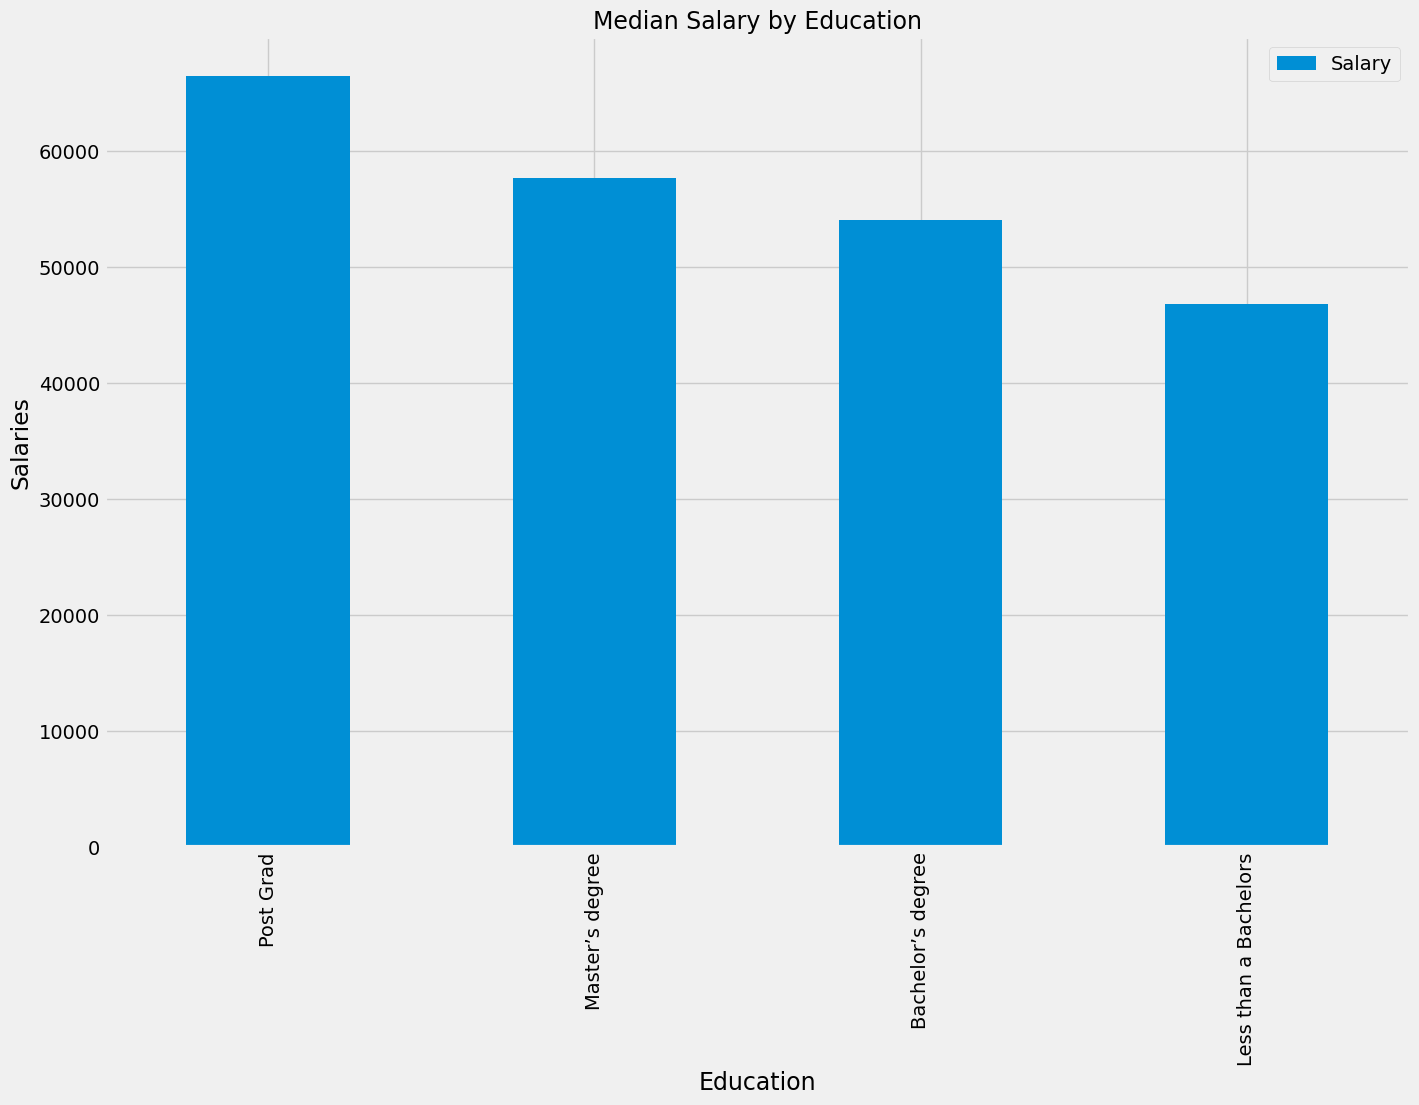

In [31]:
#Salaries have a lot of outliers (some people earn extremely high amounts).
#The mean (average) gets pulled up or down by those extremes.
edu_sal=  df[['EdLevel', 'Salary']].pivot_table(index='EdLevel', values=['Salary'], aggfunc='median')
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = edu_sal.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Median Salary by Education', size=17)
plt.xlabel('Education', size=17)
plt.ylabel('Salaries')
plt.xticks(rotation=90)
plt.show();

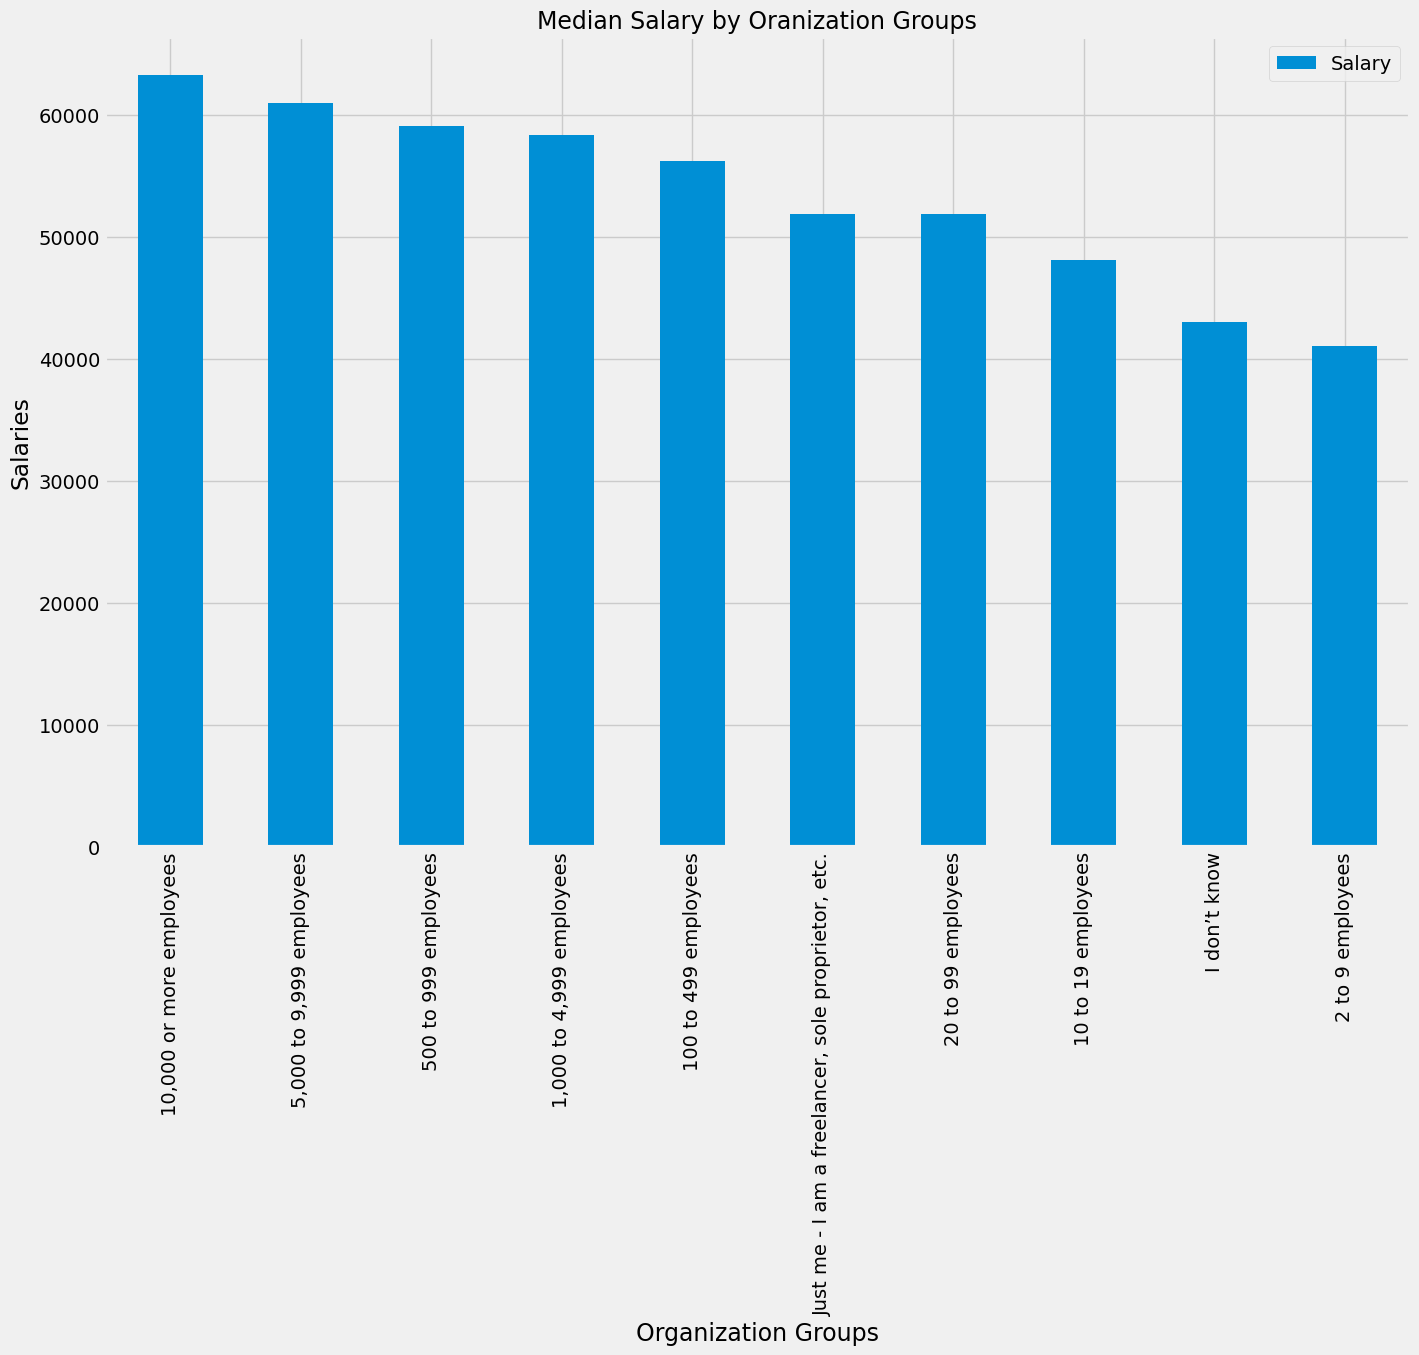

In [32]:
org_sal=  df[['OrgSize', 'Salary']].pivot_table(index='OrgSize', values=['Salary'], aggfunc='median')

plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = org_sal.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Median Salary by Oranization Groups', size=17)
plt.xlabel('Organization Groups', size=17)
plt.ylabel('Salaries')
plt.xticks(rotation=90)
plt.show();

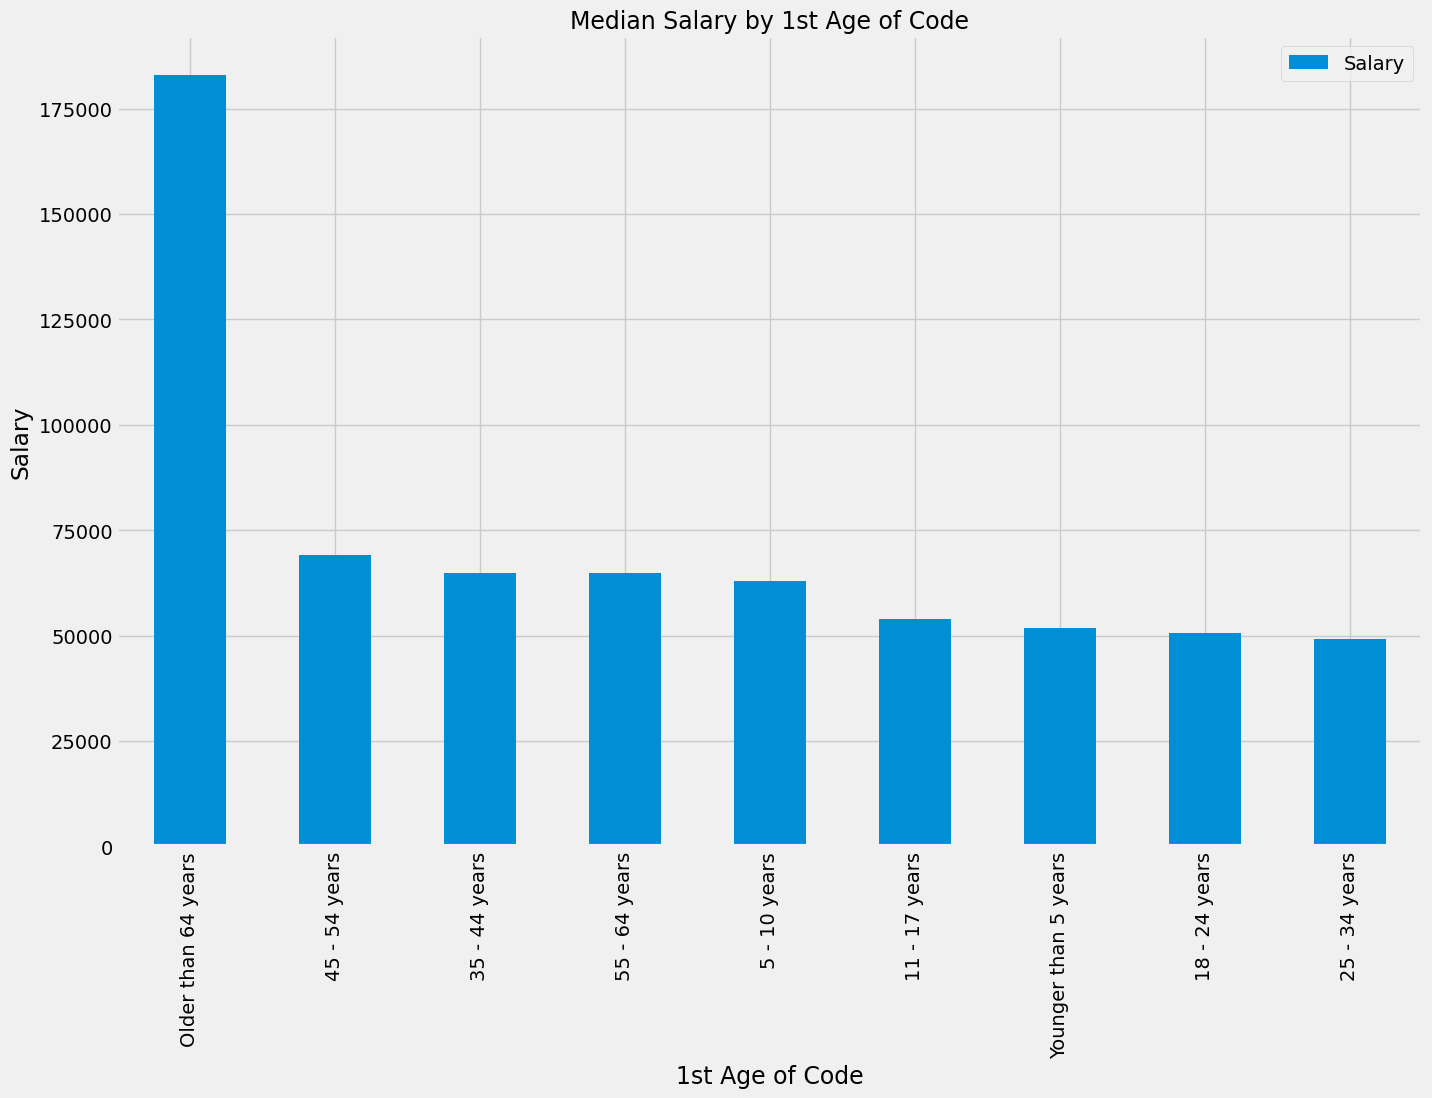

In [33]:
#Someone who started coding at 25 years old is probably older now (35–45) → more years in the workforce, higher position, higher salary.
#Someone who started at 12 years old might still be in their early 20s → less work experience → lower salary for now.

Age_of_Code = df[['Age1stCode', 'Salary']].pivot_table(index='Age1stCode', values=['Salary'], aggfunc='median')

plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph2 = Age_of_Code.sort_values(by = 'Salary', ascending = False).plot(kind = 'bar')
plt.title('Median Salary by 1st Age of Code', size=17)
plt.xlabel('1st Age of Code', size=17)
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show();

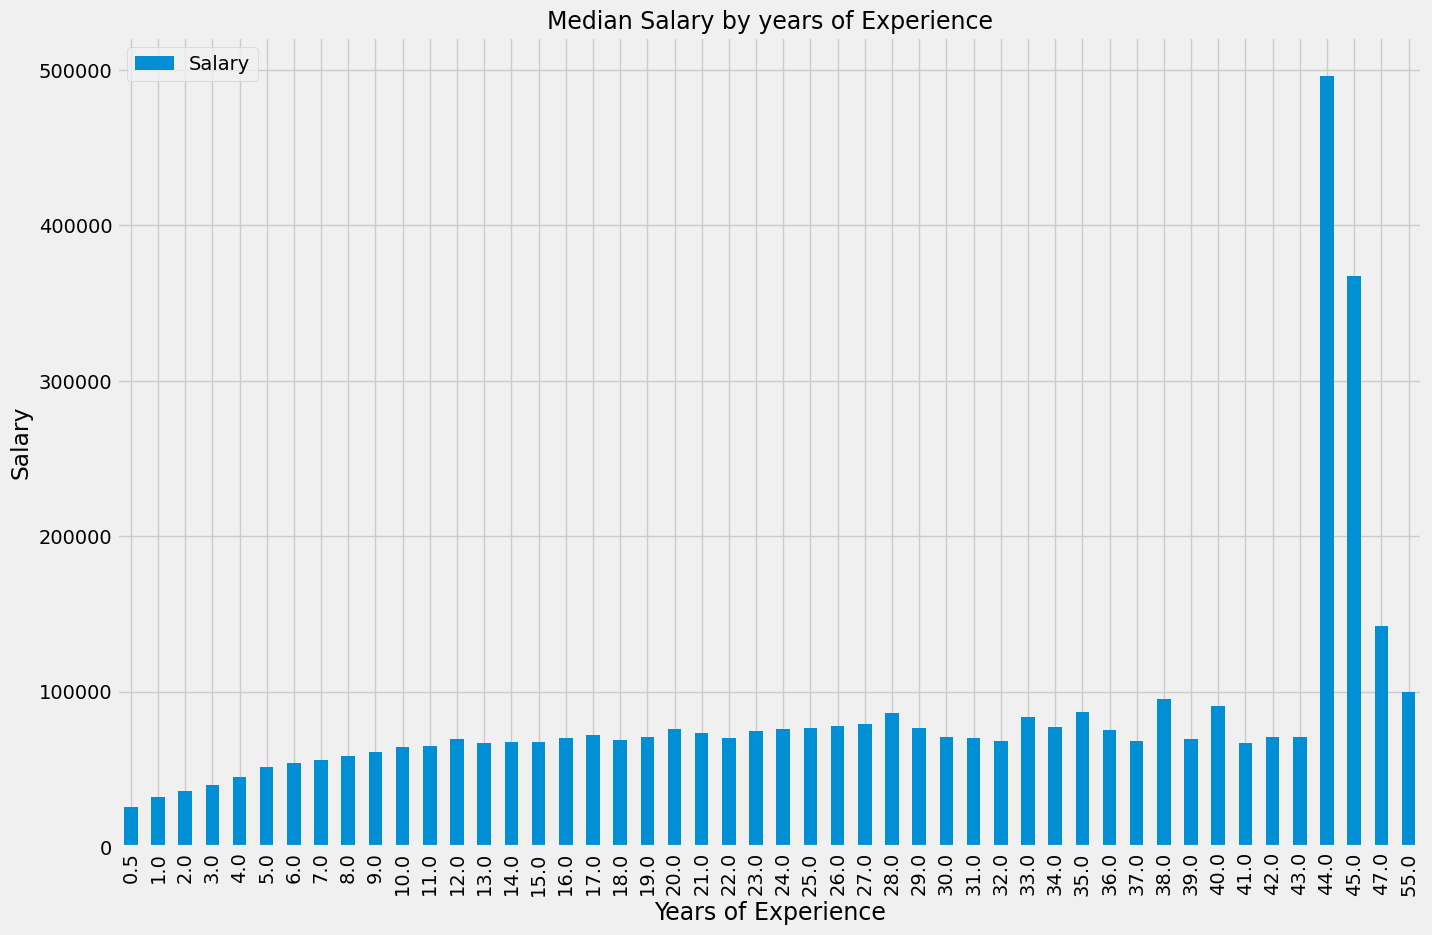

In [34]:
salary_by_exper = df[['YearsCodePro', 'Salary']].pivot_table(index='YearsCodePro', values=['Salary'], aggfunc='median')

plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('fivethirtyeight')
graph = salary_by_exper.plot(kind='bar')
plt.title('Median Salary by years of Experience', size=17)
plt.xlabel('Years of Experience', size=17)
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show();

In [35]:
df = df.drop("Employment", axis=1)

In [36]:
df.to_csv('cleaned_dataset.csv', index=False)

In [37]:
from sklearn.preprocessing import LabelEncoder

label_cols = [ 'EdLevel', 'Age', 'DevType', 'OpSys', 'OrgSize', 'Age1stCode', 'LanguageHaveWorkedWith']

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

## Data transformation

In [38]:
df = pd.read_csv('cleaned_dataset.csv')

In [39]:
df = df.merge(pd.get_dummies(df['DevType'], prefix='DevType'),right_index=True, left_index=True)
df.drop(columns='DevType', inplace=True)
df = df.merge(pd.get_dummies(df['EdLevel'], prefix='EdLevel'),right_index=True, left_index=True)
df.drop(columns='EdLevel', inplace=True)

In [40]:
df.head()


,Country,YearsCodePro,Age,Age1stCode,LanguageHaveWorkedWith,OrgSize,OpSys,Salary,DevType_Academic Reseacher,DevType_Back-end Developer,...,DevType_Game Developer,DevType_Mobile Developer,DevType_Product Manager,DevType_QA tester,DevType_Senior Executive,DevType_System Administrator,EdLevel_Bachelor’s degree,EdLevel_Less than a Bachelors,EdLevel_Master’s degree,EdLevel_Post Grad
0,Sweden,4.0,25-34 years old,11 - 17 years,Python,10 to 19 employees,Linux-based,51552.0,False,False,...,False,False,False,False,False,False,False,False,True,False
1,Spain,5.0,25-34 years old,11 - 17 years,JavaScript,10 to 19 employees,Linux-based,46482.0,False,True,...,False,False,False,False,False,False,True,False,False,False
2,Germany,6.0,25-34 years old,11 - 17 years,Java,"1,000 to 4,999 employees",Linux-based,77290.0,False,True,...,False,False,False,False,False,False,False,False,True,False
3,France,2.0,25-34 years old,11 - 17 years,JavaScript,10 to 19 employees,Linux-based,38915.0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,Germany,18.0,35-44 years old,11 - 17 years,JavaScript,"1,000 to 4,999 employees",Linux-based,77831.0,False,False,...,False,False,False,False,False,False,False,False,True,False


In [41]:
df.Age.unique()

array(['25-34 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'], dtype=object)

In [42]:
df['age_extr'] = df['Age'].copy()
df['age_extr'] = df['age_extr'].str.replace('Prefer not to say','0')
df['age_extr'] = df['age_extr'].str.replace('Under 18 years old','18')

In [43]:
df['age_extr']

0        25-34 years old
1        25-34 years old
2        25-34 years old
3        25-34 years old
4        35-44 years old
              ...       
15616    45-54 years old
15617    35-44 years old
15618    25-34 years old
15619    25-34 years old
15620    18-24 years old
Name: age_extr, Length: 15621, dtype: object

In [44]:
le_age = LabelEncoder()
df['age_extr_trans'] = le_age.fit_transform(df['age_extr'])

In [45]:
df['age_extr_trans']

0        3
1        3
2        3
3        3
4        4
        ..
15616    5
15617    4
15618    3
15619    3
15620    2
Name: age_extr_trans, Length: 15621, dtype: int32

In [46]:
df = df.drop(columns=['Age', 'age_extr']).rename(columns={'age_extr_trans':'age_transformed'})

In [47]:
# Target mean encoding
df = df.merge(df.groupby('Country')['Salary'].mean().reset_index().rename(columns={'Salary':'aver_count_salary'}), on='Country')

In [48]:
df[['Country', 'aver_count_salary']].drop_duplicates().to_csv('average_salaries.csv', index=False)

average_salaries = df.groupby("Country")["Salary"].mean().reset_index()
average_salaries.rename(columns={"Salary": "aver_count_salary"}, inplace=True)


In [49]:
df.drop(columns='Country', inplace=True)

In [50]:
df = df.drop(['Age1stCode','OrgSize','LanguageHaveWorkedWith','OpSys' ], axis=1)

In [51]:
df.head()

,YearsCodePro,Salary,DevType_Academic Reseacher,DevType_Back-end Developer,DevType_Data Scientist or ML Specialist,DevType_Data or Business Analyst,DevType_Database Administrator,DevType_DevOps Specialist,"DevType_Engineer, Site Reliability",DevType_Engineering Manager,...,DevType_Product Manager,DevType_QA tester,DevType_Senior Executive,DevType_System Administrator,EdLevel_Bachelor’s degree,EdLevel_Less than a Bachelors,EdLevel_Master’s degree,EdLevel_Post Grad,age_transformed,aver_count_salary
0,4.0,51552.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,3,73521.478198
1,5.0,46482.0,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,3,79441.369176
2,6.0,77290.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,3,103259.960808
3,2.0,38915.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,3,84820.847364
4,18.0,77831.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,4,103259.960808


In [52]:
df['percentage']= df.Salary/df.aver_count_salary

In [53]:
df.head()

,YearsCodePro,Salary,DevType_Academic Reseacher,DevType_Back-end Developer,DevType_Data Scientist or ML Specialist,DevType_Data or Business Analyst,DevType_Database Administrator,DevType_DevOps Specialist,"DevType_Engineer, Site Reliability",DevType_Engineering Manager,...,DevType_QA tester,DevType_Senior Executive,DevType_System Administrator,EdLevel_Bachelor’s degree,EdLevel_Less than a Bachelors,EdLevel_Master’s degree,EdLevel_Post Grad,age_transformed,aver_count_salary,percentage
0,4.0,51552.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,3,73521.478198,0.701183
1,5.0,46482.0,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,3,79441.369176,0.585111
2,6.0,77290.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,3,103259.960808,0.748499
3,2.0,38915.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,3,84820.847364,0.458791
4,18.0,77831.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,4,103259.960808,0.753738


# Check for outliers

In [54]:
df[df.percentage<=0.4].count()
#True if the person’s salary is 40% or less of the average salary in their country.

YearsCodePro                               2886
Salary                                     2886
DevType_Academic Reseacher                 2886
DevType_Back-end Developer                 2886
DevType_Data Scientist or ML Specialist    2886
DevType_Data or Business Analyst           2886
DevType_Database Administrator             2886
DevType_DevOps Specialist                  2886
DevType_Engineer, Site Reliability         2886
DevType_Engineering Manager                2886
DevType_Front-end Developer                2886
DevType_Full-stack Developer               2886
DevType_Game Developer                     2886
DevType_Mobile Developer                   2886
DevType_Product Manager                    2886
DevType_QA tester                          2886
DevType_Senior Executive                   2886
DevType_System Administrator               2886
EdLevel_Bachelor’s degree                  2886
EdLevel_Less than a Bachelors              2886
EdLevel_Master’s degree                 

In [55]:
df[(df['percentage']>1.5) & (df['YearsCodePro']<3)].count()
#This code finds new/less experienced developers (under 3 years) who are earning much higher than the average (150%+ of their country’s average salary) and counts them.

YearsCodePro                               94
Salary                                     94
DevType_Academic Reseacher                 94
DevType_Back-end Developer                 94
DevType_Data Scientist or ML Specialist    94
DevType_Data or Business Analyst           94
DevType_Database Administrator             94
DevType_DevOps Specialist                  94
DevType_Engineer, Site Reliability         94
DevType_Engineering Manager                94
DevType_Front-end Developer                94
DevType_Full-stack Developer               94
DevType_Game Developer                     94
DevType_Mobile Developer                   94
DevType_Product Manager                    94
DevType_QA tester                          94
DevType_Senior Executive                   94
DevType_System Administrator               94
EdLevel_Bachelor’s degree                  94
EdLevel_Less than a Bachelors              94
EdLevel_Master’s degree                    94
EdLevel_Post Grad                 

In [56]:
df[(df['percentage']>1.5) & (df['YearsCodePro']<3)].count()

YearsCodePro                               94
Salary                                     94
DevType_Academic Reseacher                 94
DevType_Back-end Developer                 94
DevType_Data Scientist or ML Specialist    94
DevType_Data or Business Analyst           94
DevType_Database Administrator             94
DevType_DevOps Specialist                  94
DevType_Engineer, Site Reliability         94
DevType_Engineering Manager                94
DevType_Front-end Developer                94
DevType_Full-stack Developer               94
DevType_Game Developer                     94
DevType_Mobile Developer                   94
DevType_Product Manager                    94
DevType_QA tester                          94
DevType_Senior Executive                   94
DevType_System Administrator               94
EdLevel_Bachelor’s degree                  94
EdLevel_Less than a Bachelors              94
EdLevel_Master’s degree                    94
EdLevel_Post Grad                 

In [57]:
# Drop the outliers

df = df[~((df['percentage']<0.4) & (df['YearsCodePro']>2))]
df = df[~((df['percentage']>1.5) & (df['YearsCodePro']<3))]
df = df[~((df['percentage']<1) & (df['YearsCodePro']>15))]

In [58]:
df.columns

Index(['YearsCodePro', 'Salary', 'DevType_Academic Reseacher',
       'DevType_Back-end Developer', 'DevType_Data Scientist or ML Specialist',
       'DevType_Data or Business Analyst', 'DevType_Database Administrator',
       'DevType_DevOps Specialist', 'DevType_Engineer, Site Reliability',
       'DevType_Engineering Manager', 'DevType_Front-end Developer',
       'DevType_Full-stack Developer', 'DevType_Game Developer',
       'DevType_Mobile Developer', 'DevType_Product Manager',
       'DevType_QA tester', 'DevType_Senior Executive',
       'DevType_System Administrator', 'EdLevel_Bachelor’s degree',
       'EdLevel_Less than a Bachelors', 'EdLevel_Master’s degree',
       'EdLevel_Post Grad', 'age_transformed', 'aver_count_salary',
       'percentage'],
      dtype='object')

In [59]:
df.drop(columns='percentage', inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12221 entries, 0 to 15619
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   YearsCodePro                             12221 non-null  float64
 1   Salary                                   12221 non-null  float64
 2   DevType_Academic Reseacher               12221 non-null  bool   
 3   DevType_Back-end Developer               12221 non-null  bool   
 4   DevType_Data Scientist or ML Specialist  12221 non-null  bool   
 5   DevType_Data or Business Analyst         12221 non-null  bool   
 6   DevType_Database Administrator           12221 non-null  bool   
 7   DevType_DevOps Specialist                12221 non-null  bool   
 8   DevType_Engineer, Site Reliability       12221 non-null  bool   
 9   DevType_Engineering Manager              12221 non-null  bool   
 10  DevType_Front-end Developer              12221 non-

In [61]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [62]:
X.columns.values

array(['YearsCodePro', 'DevType_Academic Reseacher',
       'DevType_Back-end Developer',
       'DevType_Data Scientist or ML Specialist',
       'DevType_Data or Business Analyst',
       'DevType_Database Administrator', 'DevType_DevOps Specialist',
       'DevType_Engineer, Site Reliability',
       'DevType_Engineering Manager', 'DevType_Front-end Developer',
       'DevType_Full-stack Developer', 'DevType_Game Developer',
       'DevType_Mobile Developer', 'DevType_Product Manager',
       'DevType_QA tester', 'DevType_Senior Executive',
       'DevType_System Administrator', 'EdLevel_Bachelor’s degree',
       'EdLevel_Less than a Bachelors', 'EdLevel_Master’s degree',
       'EdLevel_Post Grad', 'age_transformed', 'aver_count_salary'],
      dtype=object)

In [63]:
X.shape

(12221, 23)

## Import the ML libraries

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from math import sqrt

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [68]:
import sklearn.metrics

In [69]:
# Randon Forest Regression
model_rf = RandomForestRegressor(random_state=42,n_estimators=600,max_depth=13,bootstrap=True,max_features=17)
model_rf.fit(X_train.values,y_train.values)
pred_rf = model_rf.predict(X_test.values)

In [70]:
# Linear Regression

model_lr = LinearRegression()
model_lr.fit(X_train.values, y_train.values)
pred_lr =  model_lr.predict(X_test.values)

In [71]:
# Decision Tree

model_dt = DecisionTreeRegressor(random_state=42, splitter='random',max_depth=150,max_leaf_nodes=100,max_features='sqrt')
model_dt.fit(X_train.values, y_train.values)
pred_dt = model_dt.predict(X_test.values)

In [72]:
# Randon Forest Regression

print ("RMSE rf: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_rf)),2)))
print ("MAPE rf: " + str(round(mean_absolute_percentage_error(y_test.values, pred_rf),2)*100))
print("R_squared: " + str(round(r2_score(y_test.values,pred_rf),2)))

# Linear Regression

print ("RMSE lr: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_lr)),2)))
print ("MAPE lr " + str(round(mean_absolute_percentage_error(y_test.values, pred_lr),2)*100))
print("R_squared: " + str(round(r2_score(y_test.values,pred_lr),2)))

# Decision Tree

print ("RMSE dt: $" + str(round(sqrt(mean_squared_error(y_test.values, pred_dt)),2)))
print ("MAPE dt: " + str(round(mean_absolute_percentage_error(y_test.values, pred_dt),2)*100))
print("R_squared: " + str(round(r2_score(y_test.values,pred_dt),2)))


RMSE rf: $166964.39
MAPE rf: 71.0
R_squared: 0.03
RMSE lr: $159084.38
MAPE lr 86.0
R_squared: 0.12
RMSE dt: $187323.8
MAPE dt: 121.0
R_squared: -0.22


## Testing

In [73]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt

def predict_best_salary(user_input, model_rf, model_lr, model_dt, average_salaries, feature_columns,
                        X_test=None, y_test=None):


    # Education Mapping
    def education(x):
        if 'Professional degree' in x or 'Bachelor' in x:
            return 'Bachelor’s degree'
        if 'Master' in x:
            return 'Master’s degree'
        if 'Other doctoral degree' in x or 'PhD' in x:
            return 'Post Grad'
        return 'Less than a Bachelors'

    # Experience Mapping
    def experience(x):
        if x == 'More than 50 years':
            return 55
        if x == 'Less than 1 year':
            return 0.5
        return float(x)

    # Developer Type Mapping
    def dev_type(x):
        x = x.lower()
        if 'full-stack' in x:
            return 'Full-stack Developer'
        if 'back-end' in x:
            return 'Back-end Developer'
        if 'front-end' in x:
            return 'Front-end Developer'
        if 'mobile' in x:
            return 'Mobile Developer'
        if 'devops' in x:
            return 'DevOps Specialist'
        if 'data scientist' in x:
            return 'Data Scientist or ML Specialist'
        if 'data engineer' in x:
            return 'Data Engineer'
        if 'analyst' in x:
            return 'Data or Business Analyst'
        return 'Other'

    # Process input
    edu = education(user_input['EdLevel'])
    exp = experience(user_input['YearsCodePro'])
    dev = dev_type(user_input['DevType'])
    country = user_input['Country']

    # Create dataframe
    input_df = pd.DataFrame([{
        "YearsCodePro": exp,
        "Country": country,
        "EdLevel": edu,
        "DevType": dev
    }])

    # Add country average salary
    input_df = input_df.merge(average_salaries, on="Country", how="left")

    # One-hot encode categorical features
    input_df = pd.get_dummies(input_df, columns=["EdLevel","DevType"], drop_first=True)

    # Align with training features
    for col in feature_columns:
        if col not in input_df.columns:
            input_df[col] = 0
    input_df = input_df[feature_columns]

    # Get predictions
    pred_rf = model_rf.predict(input_df)[0]
    pred_lr = model_lr.predict(input_df)[0]
    pred_dt = model_dt.predict(input_df)[0]

    predictions = {
        "Random Forest": pred_rf,
        "Linear Regression": pred_lr,
        "Decision Tree": pred_dt
    }

    # ---- Compare models dynamically ----
    scores = {}
    if X_test is not None and y_test is not None:
        for name, model in zip(["Random Forest", "Linear Regression", "Decision Tree"],
                               [model_rf, model_lr, model_dt]):
            y_pred = model.predict(X_test)
            rmse = sqrt(mean_squared_error(y_test, y_pred))
            mape = mean_absolute_percentage_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            scores[name] = {"RMSE": rmse, "MAPE": mape, "R2": r2}
        # pick model with highest R²
        best_model = max(scores, key=lambda k: scores[k]["R2"])
    else:
        # fallback: pick model with median prediction (robust choice if no test data)
        best_model = min(predictions, key=predictions.get)

    best_pred = predictions[best_model]

    return predictions, best_model, best_pred, scores if scores else None

In [74]:
feature_columns = X.columns.tolist()

user_input = {
    "EdLevel": "Master’s degree",
    "Country": "Austria",
    "YearsCodePro": "5",
    "DevType": "Data Scientist or ML Specialist"
}

predictions, best_model, best_salary, scores = predict_best_salary(
    user_input, model_rf, model_lr, model_dt, average_salaries, feature_columns, 
    X_test=X_test, y_test=y_test
)

print("Predictions:", predictions)
print("Best Model:", best_model)
print("Best Salary Prediction:", round(best_salary, 2))
print("Model Scores:", scores)


Predictions: {'Random Forest': 51529.10688376208, 'Linear Regression': 56678.56825440953, 'Decision Tree': 81700.77490774907}
Best Model: Linear Regression
Best Salary Prediction: 56678.57
Model Scores: {'Random Forest': {'RMSE': 166964.3884833634, 'MAPE': 0.7052329440218865, 'R2': 0.03393366105140916}, 'Linear Regression': {'RMSE': 159084.37635731202, 'MAPE': 0.8648965489826655, 'R2': 0.12297028675845789}, 'Decision Tree': {'RMSE': 187323.7992277633, 'MAPE': 1.2110906235374896, 'R2': -0.2160324449176907}}


In [75]:
import sklearn, numpy, pandas, sys
print("Python:", sys.version)
print("scikit-learn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)

Python: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]
scikit-learn: 1.5.1
numpy: 1.26.4
pandas: 2.2.2
